# Data Gathering

This recipe shows how we will be accessing the datasets necessary for the rest of the book.

We start by loading the necessary libraries and resetting the computational graph.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# from tensorflow.python.framework import ops
# ops.reset_default_graph()
tf.reset_default_graph()

## The Iris Dataset (R. Fisher / Scikit-Learn)

One of the most frequently used ML datasets is the iris flower dataset.  We will use the easy import tool, `datasets` from scikit-learn.  You can read more about it here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()  # irisデータクラスのインスタンスを作成  dict-like型
print(len(iris.data))
print(len(iris.target))
print(iris.data[0])
print(set(iris.target))

150
150
[5.1 3.5 1.4 0.2]
{0, 1, 2}


## Low Birthrate Dataset (Hosted on Github)

The 'Low Birthrate Dataset' is a dataset from a famous study by Hosmer and Lemeshow in 1989 called, "Low Infant Birth Weight Risk Factor Study".  It is a very commonly used academic dataset mostly for logistic regression.  We will host this dataset on the public Github here:
https://github.com/nfmcclure/tensorflow_cookbook/raw/master/01_Introduction/07_Working_with_Data_Sources/birthweight_data/birthweight.dat

In [26]:
import requests

birthdata_url = 'https://github.com/nfmcclure/tensorflow_cookbook/' \
                'raw/master/01_Introduction/07_Working_with_Data_Sources/' \
                'birthweight_data/birthweight.dat'
birth_file = requests.get(birthdata_url)
# birth_fileのtextを'\r\n'で分割 -> データの行を要素としたリスト(birth_data)ができる
birth_data = birth_file.text.split('\r\n')  # \r はCRを意味する．昔のMacでの改行文字コードだった
# birth_data の0要素め(=特徴名)をタブで分割 -> 特徴名を要素としたリスト(=ヘッダ)ができる
birth_header = birth_data[0].split('\t')
# 各要素に特徴のリストをもつリストを作成
birth_data = [[float(x) for x in y.split('\t') if len(x) >= 1]
              for y in birth_data[1:] if len(y) >= 1]
print(len(birth_data))
print(len(birth_data[0]))

189
9


[requestsモジュールnについて](https://qiita.com/sqrtxx/items/49beaa3795925e7de666)

<br>
上のCodeで
```python
birth_data = [[float(x) for x in y.split('\t') if len(x) >= 1]
              for y in birth_data[1:] if len(y) >= 1]
```
ではリスト内包表記のネストが使われている． 詳しくは以下を参照  
https://qiita.com/y__sama/items/a2c458de97c4aa5a98e7

In [41]:
print("for文")
for i in range(10):
    if i > 5:
        for j in range(10):
            if j > 5:
                print((i, j), end=' | ')

for文
(6, 6) | (6, 7) | (6, 8) | (6, 9) | (7, 6) | (7, 7) | (7, 8) | (7, 9) | (8, 6) | (8, 7) | (8, 8) | (8, 9) | (9, 6) | (9, 7) | (9, 8) | (9, 9) | 

In [40]:
print("ネストのリスト内包表記")
# 先にjのforが周り, jが決まったら　内側のリスト内包表記(i の for)が走る
[[(i, j) for i in range(10) if i > 5] for j in range(10)]

ネストのリスト内包表記


[[(6, 0), (7, 0), (8, 0), (9, 0)],
 [(6, 1), (7, 1), (8, 1), (9, 1)],
 [(6, 2), (7, 2), (8, 2), (9, 2)],
 [(6, 3), (7, 3), (8, 3), (9, 3)],
 [(6, 4), (7, 4), (8, 4), (9, 4)],
 [(6, 5), (7, 5), (8, 5), (9, 5)],
 [(6, 6), (7, 6), (8, 6), (9, 6)],
 [(6, 7), (7, 7), (8, 7), (9, 7)],
 [(6, 8), (7, 8), (8, 8), (9, 8)],
 [(6, 9), (7, 9), (8, 9), (9, 9)]]

In [42]:
print("ネストのリスト内包表記 外側にif文あり")
[[(i, j) for i in range(10) if i > 5] for j in range(10) if j > 5]

ネストのリスト内包表記 外側にif文あり


[[(6, 6), (7, 6), (8, 6), (9, 6)],
 [(6, 7), (7, 7), (8, 7), (9, 7)],
 [(6, 8), (7, 8), (8, 8), (9, 8)],
 [(6, 9), (7, 9), (8, 9), (9, 9)]]

## Housing Price Dataset (UCI)

We will also use a housing price dataset from the University of California at Irvine (UCI) Machine Learning Database Repository. It is a great regression dataset to use.  You can read more about it here:  
https://archive.ics.uci.edu/ml/datasets/Housing

housing data:  
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

In [45]:
import requests

housing_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/' \
                'housing/housing.data'
housing_header = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
housing_file = requests.get(housing_url)
housing_data = [[float(x) for x in y.split(' ') if len(x) >= 1]
                for y in housing_file.text.split('\n') if len(y) >= 1]
print('data size', len(housing_data))
print('feature size', len(housing_data[0]))

data size 506
feature size 14


## MNIST Handwriting Dataset (Yann LeCun)

The MNIST Handwritten digit picture dataset is the `Hello World` of image recognition. The famous scientist and researcher, Yann LeCun, hosts it on his webpage here, http://yann.lecun.com/exdb/mnist/ .  But because it is so commonly used, many libraries, including TensorFlow, host it internally.  We will use TensorFlow to access this data as follows.

If you haven't downloaded this before, please wait a bit while it downloads

In [46]:
from tensorflow.examples.tutorials.mnist import input_data

# one hot 表現にしてデータを取得
mnist = input_data.read_data_sets("/tmp/MNIST_data/", one_hot=True)
print(len(mnist.train.images))
print(len(mnist.test.images))
print(len(mnist.validation.images))
print(mnist.train.labels[1,:])

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
55000
10000
5000
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## CIFAR-10 Data

The CIFAR-10 data ( https://www.cs.toronto.edu/~kriz/cifar.html ) contains 60,000 32x32 color images of 10 classes collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.  Alex Krizhevsky maintains the page referenced here.  This is such a common dataset, that there are built in functions in TensorFlow to access this data (the keras wrapper has these commands). Note that the keras wrapper for these functions automatically splits the images into a 50,000 training set and a 10,000 test set.

In [48]:
# Running this command requires an internet connection and a few minutes to download all the images.
# dawnladsすると~/.keras/datasets に保存され，２回目からは高速にリストアできる
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

`tf.keras.datasets.cifar10.load_data()`関数については以下参照  
https://keras.io/ja/datasets/  
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

<br>
The ten categories are (in order):

<ol start="0">
  <li>Airplane</li>
  <li>Automobile</li>
  <li>Bird</li>
  <li>Car</li>
  <li>Deer</li>
  <li>Dog</li>
  <li>Frog</li>
  <li>Horse</li>
  <li>Ship</li>
  <li>Truck</li>
</ol>

In [49]:
X_train.shape

(50000, 32, 32, 3)

In [50]:
y_train.shape

(50000, 1)

In [51]:
y_train[0,] # this is a frog

array([6], dtype=uint8)

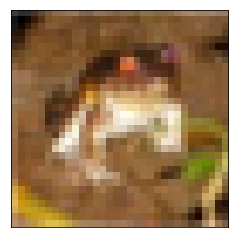

In [56]:
# Plot the 0-th image (a frog)
%matplotlib inline
img = Image.fromarray(X_train[0,:,:,:])
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## Ham/Spam Texts Dataset (UCI)

We will use another UCI ML Repository dataset called the SMS Spam Collection.  You can read about it here: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection .  As a sidenote about common terms, when predicting if a data point represents 'spam' (or unwanted advertisement), the alternative is called 'ham' (or useful information).

This is a great dataset for predicting a binary outcome (spam/ham) from a textual input.  This will be very useful for short text sequences for Natural Language Processing (Ch 7) and Recurrent Neural Networks (Ch 9).

In [70]:
import requests
import io
from zipfile import ZipFile

# Get/read zip file
zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/' \
            '00228/smsspamcollection.zip'
r = requests.get(zip_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('SMSSpamCollection')  # zipファイル内のSMSSpamCollectionファイルを読み込む
# Format Data
text_data = file.decode(encoding='utf-8')  # byte型を文字列型に変更. 'UTF-8'のバイト文字列と思い復号
# UTF-8をasciiのバイト文字列に符号化.  errors='ignore'により，変換できなかった文字列は取り除かれる
text_data = text_data.encode('ascii', errors='ignore')
text_data = text_data.decode(encoding='utf-8').split(
    '\n')  # byte型を文字列型に変更. 'UTF-8'のバイト文字列と思い復号
print('text_data[0]:', text_data[0])
text_data = [x.split('\t') for x in text_data if len(x) >= 1]
print('text_data[0]:', text_data[0])
[text_data_target, text_data_train] = [list(x) for x in zip(*text_data)]
print(len(text_data_train))
print(set(text_data_target))
print(text_data_train[1])

text_data[0]: ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
text_data[0]: ['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
5574
{'ham', 'spam'}
Ok lar... Joking wif u oni...


In [90]:
# リストは “*”(アスタリスク) 演算子を使ってアンパックすると各要素を関数の引数として渡すことができるらしい。
for i in zip(*[[1,2], [3,4]]):  # zip(*[[1,2], [3,4]]) = zip([1,2], [3, 4]) 
    print('i: ', i)
    print('list(i):', list(i))
print()
for i in zip([1,2], [3,4]):
    print('i: ', i)

i:  (1, 3)
list(i): [1, 3]
i:  (2, 4)
list(i): [2, 4]

i:  (1, 3)
i:  (2, 4)


```python
zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-' \
            'databases/00228/smsspamcollection.zip'
r = requests.get(zip_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('SMSSpamCollection')
```
に置いて...
<ol start="1">
<li>r.content は getした内容をバイナリ形式で得るメソッド</li>
<li>io.BytesIOはbyte-likeオブジェクトを受け取り， それをバイナリ形式のファイルストリームに変換する． </li> 
<li>ファイルストリームとはファイルとプログラムとの間の通り道のこと</li>
<li>ZipFileによってファイルストリームからZipFileオブジェクトを生成する</li>
</ol>
参照: https://ja.stackoverflow.com/questions/37573/zip-io-bytesio%E3%81%AE%E6%84%8F%E5%91%B3-%E4%BD%BF%E3%81%84%E6%96%B9%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6

<br>
ファイルストリームとはプログラムとファイルとの間のデータの通り道のこと  
参照: http://tech.nikkeibp.co.jp/it/article/COLUMN/20100225/344994/

<br>
python unpackについて  
http://momijiame.tumblr.com/post/33081357208/python-%E3%81%A7%E3%83%AA%E3%82%B9%E3%83%88%E3%82%92%E5%BC%95%E6%95%B0%E3%81%AB%E3%82%A2%E3%83%B3%E3%83%91%E3%83%83%E3%82%AF%E3%81%99%E3%82%8B

## Movie Review Data (Cornell)

The Movie Review database, collected by Bo Pang and Lillian Lee (researchers at Cornell), serves as a great dataset to use for predicting a numerical number from textual inputs.

You can read more about the dataset and papers using it here:
https://www.cs.cornell.edu/people/pabo/movie-review-data/

In [92]:
import requests
import io
import tarfile

movie_data_url = 'http://www.cs.cornell.edu/people/pabo/' \
                    'movie-review-data/rt-polaritydata.tar.gz'
r = requests.get(movie_data_url)
# Stream data into temp object
stream_data = io.BytesIO(r.content)
tmp = io.BytesIO()
while True:  # ここのwhile文はtmpにstream_dataを書き込んでいる?
    s = stream_data.read(16384)  # 16384B読み込む
    if not s:  
        break
    tmp.write(s)  # 読み込んだものがから出ないならば書き込む
stream_data.close()
tmp.seek(0)  # ストリーム位置を指定された offset(=0) バイトに変更
# Extract tar file
tar_file = tarfile.open(fileobj=tmp, mode="r:gz")  # Tarfileオブジェクトを生成
# アーカイブから'rt-polaritydata/rt-polarity.pos'をファイルオブジェクトとして抽出する
pos = tar_file.extractfile('rt-polaritydata/rt-polarity.pos')
neg = tar_file.extractfile('rt-polaritydata/rt-polarity.neg')
# Save pos/neg reviews
pos_data = []
for line in pos:  # 一行づつ読み込む
    pos_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
neg_data = []
for line in neg:
    neg_data.append(line.decode('ISO-8859-1').encode('ascii',errors='ignore').decode())
tar_file.close()

print(len(pos_data))
print(len(neg_data))
print(neg_data[0])

5331
5331
simplistic , silly and tedious . 



- アーカイブ
  
  ファイルやディレクトリなどを単純に一箇所に集めたもののこと。圧縮してファイルサイズを小さくすることは含まれない

## The Complete Works of William Shakespeare (Gutenberg Project)

For training a TensorFlow Model to create text, we will train it on the complete works of William Shakespeare.  This can be accessed through the good work of the Gutenberg Project.  The Gutenberg Project frees many non-copyright books by making them accessible for free from the hard work of volunteers.

You can read more about the Shakespeare works here:
http://www.gutenberg.org/ebooks/100

In [1]:
# The Works of Shakespeare Data
import requests

shakespeare_url = 'http://www.gutenberg.org/cache/epub/100/pg100.txt'
# Get Shakespeare text
response = requests.get(shakespeare_url)
shakespeare_file = response.content
# Decode binary into string
shakespeare_text = shakespeare_file.decode('utf-8')
# Drop first few descriptive paragraphs.
shakespeare_text = shakespeare_text[7675:]
print(len(shakespeare_text))

5582212


In [4]:
print(shakespeare_text[: 100])

From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as 


## English-German Sentence Translation Database (Manythings/Tatoeba)

The Tatoeba Project is also run by volunteers and is set to make the most bilingual sentence translations available between many different languages.  `Manythings.org` compiles the data and makes it accessible.

http://www.manythings.org/corpus/about.html#info

More bilingual sentence pairs: http://www.manythings.org/bilingual/

In [5]:
# English-German Sentence Translation Data
import requests
import io
from zipfile import ZipFile
sentence_url = 'http://www.manythings.org/anki/deu-eng.zip'
r = requests.get(sentence_url)
z = ZipFile(io.BytesIO(r.content))
file = z.read('deu.txt')
# Format Data
eng_ger_data = file.decode()
eng_ger_data = eng_ger_data.encode('ascii',errors='ignore')
eng_ger_data = eng_ger_data.decode().split('\n')
eng_ger_data = [x.split('\t') for x in eng_ger_data if len(x)>=1]
[english_sentence, german_sentence] = [list(x) for x in zip(*eng_ger_data)]
print(len(english_sentence))
print(len(german_sentence))
print(eng_ger_data[10])

159204
159204
['Hello!', 'Hallo!']
